<a href="https://colab.research.google.com/github/luanmarcosV/Walmart_Expansion-DNC_Derivable_Slot03/blob/main/C%C3%B3pia_de_Walmart_Expans%C3%A3o_Loja_SLOT_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Informações dos dados do dataframe de vendas

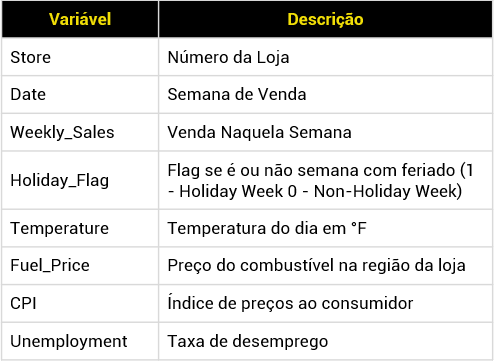

Informações sobre os feriados

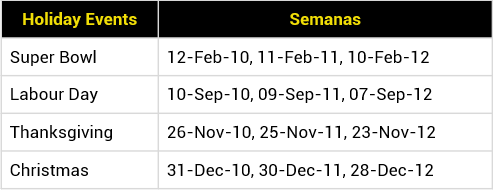

Informações adicionais com microambiente da localização da loja

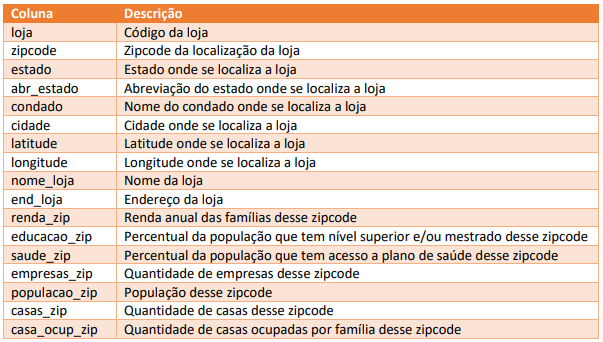

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option("display.float_format", lambda x: "%.2f" % x)


In [ ]:
df_complementar = pd.read_csv('/content/walmart_complemento.csv', sep = ';')
df = pd.read_csv('/content/Walmart.csv')
df_complementar.rename(columns={'loja':'Store'}, inplace = True)
df_complete = df.join(df_complementar.set_index('Store'), on='Store')
df_complete.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Store          6435 non-null   int64  
 1   Date           6435 non-null   object 
 2   Weekly_Sales   6435 non-null   float64
 3   Holiday_Flag   6435 non-null   int64  
 4   Temperature    6435 non-null   float64
 5   Fuel_Price     6435 non-null   float64
 6   CPI            6435 non-null   float64
 7   Unemployment   6435 non-null   float64
 8   zipcode        6435 non-null   int64  
 9   estado         6435 non-null   object 
 10  abr_estado     6435 non-null   object 
 11  condado        6435 non-null   object 
 12  cidade         6435 non-null   object 
 13  latitude       6435 non-null   int64  
 14  longitude      6435 non-null   int64  
 15  nome_loja      6435 non-null   object 
 16  end_loja       6435 non-null   object 
 17  renda_zip      6435 non-null   int64  
 18  educacao

#Note-se que não existem valores nulos ou NaN no dataset

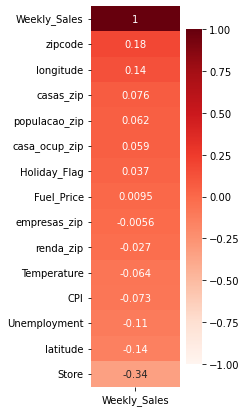

In [ ]:
df_drop_date = df_complete.drop(columns = ['Date'])
plt.figure(figsize=(2, 7))
heatmap = sns.heatmap(df_drop_date.corr()[['Weekly_Sales']].sort_values(by='Weekly_Sales', ascending=False), vmin=-1, vmax=1, annot=True, cmap='Reds')

#Percebe-se que os dados retirados do dataset não mostram que eles possuem correlação, logo não conseguimos retirar um insight forte através do gráfico de heatmap

In [ ]:
#Retirando a média de vendas semanais
df_complete['Sales_Mean'] = df_complete['Weekly_Sales'].mean()
df_complete.head(3)

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,zipcode,estado,...,nome_loja,end_loja,renda_zip,educacao_zip,saude_zip,empresas_zip,populacao_zip,casas_zip,casa_ocup_zip,Sales_Mean
0,1,05-02-2010,1643690.90,0,42.31,2.57,211.10,8.11,72756,Arkansas,...,Rogers Supercenter,2110 W Walnut St,53368,"22,5","13,9",1202,38455,16779,14344,1046964.88
1,1,12-02-2010,1641957.44,1,38.51,2.55,211.24,8.11,72756,Arkansas,...,Rogers Supercenter,2110 W Walnut St,53368,"22,5","13,9",1202,38455,16779,14344,1046964.88
2,1,19-02-2010,1611968.17,0,39.93,2.51,211.29,8.11,72756,Arkansas,...,Rogers Supercenter,2110 W Walnut St,53368,"22,5","13,9",1202,38455,16779,14344,1046964.88


In [ ]:
#Agrupando os dados por loja e incluindo a tabela complementar com os dados microambientais

df_sales_mean = df.groupby(by = 'Store').mean()
df_complete2 = df_sales_mean.join(df_complementar.set_index('Store'), on='Store')
df_complete2.head(3)

,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,zipcode,estado,abr_estado,condado,...,longitude,nome_loja,end_loja,renda_zip,educacao_zip,saude_zip,empresas_zip,populacao_zip,casas_zip,casa_ocup_zip
Store,,,,,,,,,,,,,,,,,,,,,
1,1555264.40,0.07,68.31,3.22,216.00,7.61,72756,Arkansas,AR,Benton County,...,-94149024,Rogers Supercenter,2110 W Walnut St,53368,"22,5","13,9",1202,38455,16779,14344
2,1925751.34,0.07,68.22,3.22,215.65,7.62,72601,Arkansas,AR,Boone County,...,-93139074,Harrison Supercenter,161 N Walmart Dr,47147,"19,5","6,8",759,30163,13468,12338
3,402704.44,0.07,71.43,3.22,219.39,7.18,30529,Georgia,GA,Jackson County,...,-83456616,Commerce Supercenter,30983 Highway 441 S,51539,"18,7","17,6",421,10920,4567,3992


In [ ]:
#Descrobrindo a média de vendas
sales_mean = df_complete2['Weekly_Sales'].mean()
print(sales_mean)

1046964.8775617717


In [ ]:
#Filtrando todos os valores à cima da média de vendas
df_fill_sales = df_complete2[df_complete2['Weekly_Sales'] >= 1046964]
df_fill_sales.head(5)

,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,zipcode,estado,abr_estado,condado,...,longitude,nome_loja,end_loja,renda_zip,educacao_zip,saude_zip,empresas_zip,populacao_zip,casas_zip,casa_ocup_zip
Store,,,,,,,,,,,,,,,,,,,,,
1,1555264.40,0.07,68.31,3.22,216.00,7.61,72756,Arkansas,AR,Benton County,...,-94149024,Rogers Supercenter,2110 W Walnut St,53368,"22,5","13,9",1202,38455,16779,14344
2,1925751.34,0.07,68.22,3.22,215.65,7.62,72601,Arkansas,AR,Boone County,...,-93139074,Harrison Supercenter,161 N Walmart Dr,47147,"19,5","6,8",759,30163,13468,12338
4,2094712.96,0.07,62.25,3.22,128.68,5.96,72761,Arkansas,AR,Benton County,...,-94512608,Siloam Springs Supercenter,2901 Highway 412 E,57225,28,"11,5",522,21211,8192,7336
6,1564728.19,0.07,69.70,3.22,217.55,6.61,65613,Missouri,MO,Polk County,...,-93403975,Bolivar Supercenter,2451 S Springfield Ave,43735,"24,3","14,1",438,17396,7269,6522
10,1899424.57,0.07,72.24,3.58,128.68,8.36,74464,Oklahoma,OK,Cherokee County,...,-94979859,Tahlequah Supercenter,2020 S Muskogee Ave,42112,"30,8","22,3",590,30111,12693,11308


Note-se que a Loja 4 possui maior média de vendas, o menor CPI, a menor taxa de desemprego e a maior renda por código ZIP entre as lojas. Se aumentarmos o CPI em 20 pontos, o faturamento subiria ao menos 20%.

#Com isso, concluíse que a melhor loja para ampliarmos seria a loja 4, por possuir CPI baixissimo e a renda média da população ser uma das mais altas, o que demonstra que a loja possui um grande potencial para espanção tanto em tamanho quanto em faturamento.